# BL40A2010 Introduction to IoT-Based Systems

## Tutorial 1: Uploading and plotting time series

## Author: Pedro Nardelli

### Links

[Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

[Time series with Pandas](http://nbviewer.jupyter.org/github/koldunovn/earthpy.org/blob/master/content/earthpy_pandas_basics.ipynb)

[Pandas visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html#)

In [2]:
#pip install -r requirements.txt

In [3]:
#Import libraries
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import matplotlib.dates as mdates #https://matplotlib.org/
import numpy as np #http://www.numpy.org/
#from datetime import date #https://docs.python.org/3/library/datetime.html

### Upload data 

[Pandas read_csv function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [4]:
#Read csv file using pandas 
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
ElectricityConsumption = pd.read_csv("events.csv",sep=",", 
                                     header=0,decimal=b".", index_col=0,parse_dates=True, usecols=[0,4])


In [5]:
#Checking the table
#ElectricityConsumption #Full table
ElectricityConsumption.head() #Just a sample from "head()"
type(ElectricityConsumption["Sähkönkulutus Suomessa"][1])

numpy.float64

### Plot

[Matplotlib basics](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

(array([19366., 19367., 19368., 19369., 19370., 19371., 19372., 19373.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

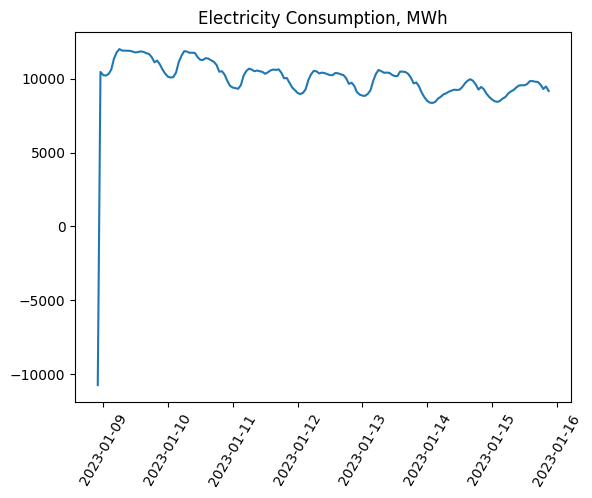

In [6]:
#Creating a basic plot using matplotlib
plt.plot(ElectricityConsumption)
plt.title("Electricity Consumption, MWh")
plt.xticks(rotation=60)

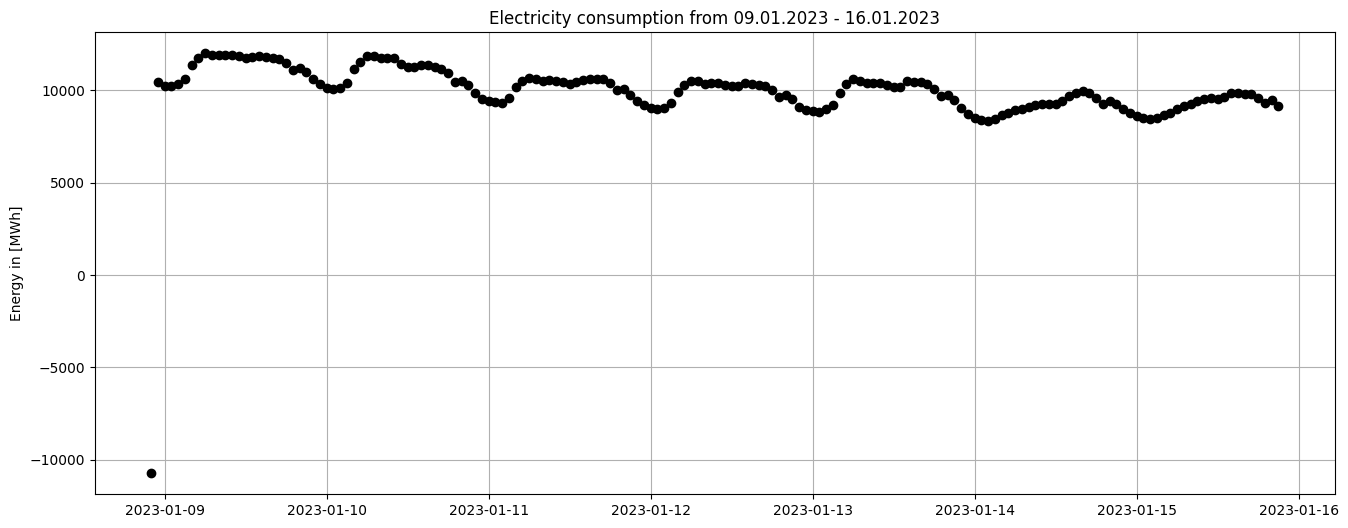

In [7]:
#Improving visualization
#####
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
#####
#plot size
plt.figure(figsize=(16,6)) 
#plot, defining color, marker and line style
plt.plot(ElectricityConsumption,color='black', marker='o',linestyle='none') 
plt.title("Electricity consumption from 09.01.2023 - 16.01.2023") 
plt.ylabel("Energy in [MWh]") #y-axis label
plt.grid(True) #grid
plt.show() #show plot

### Analyzing specific ranges

In [8]:
#Information about specific periods
ElectricityConsumption['2023-01-10'].info() #one month
#ElectricityConsumption['2018-1':'2018-3'].info() #ranges months
#ElectricityConsumption['2018-1-1':'2018-1-14'].info() #ranges days
#ElectricityConsumption['2018-1-14 02:00:00':'2018-1-17 04:00:00'].info() #ranges hours

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2023-01-10 00:00:00 to 2023-01-10 23:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sähkönkulutus Suomessa  24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_17300\3538991372.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ElectricityConsumption['2023-01-10'].info() #one month


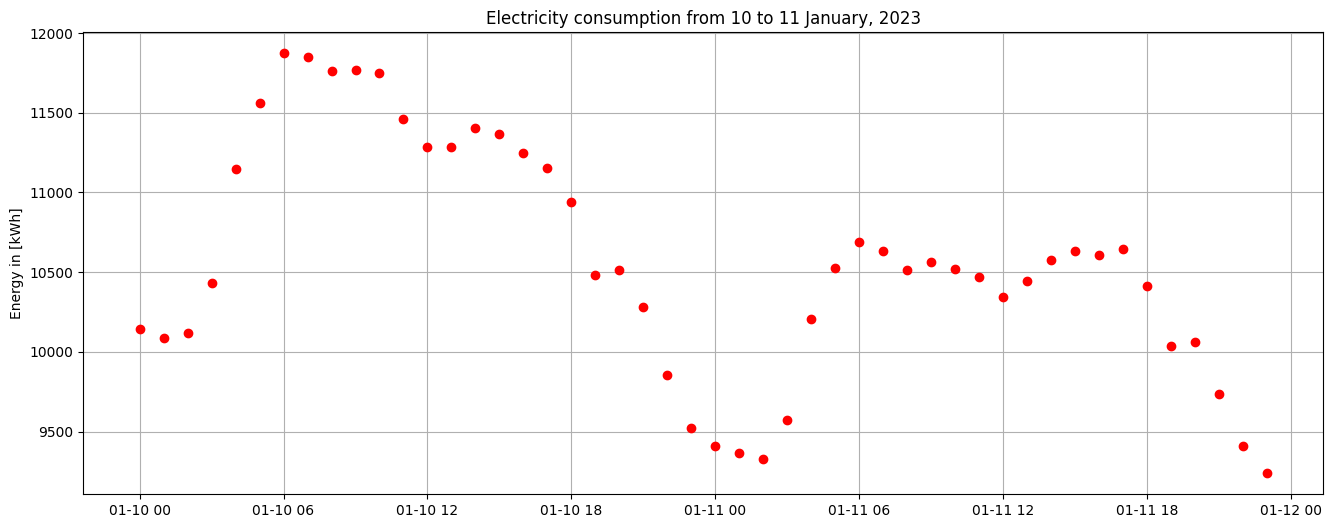

In [9]:
#Two days
plt.figure(figsize=(16,6)) 
plt.plot(ElectricityConsumption['2023-01-10':'2023-01-11'],color='red', marker='o',linestyle='')
plt.title("Electricity consumption from 10 to 11 January, 2023")
plt.ylabel("Energy in [kWh]")
plt.grid(True) 
plt.show() 

C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_17300\1635219273.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(ElectricityConsumption['2023-01-10'],color='black', marker='x',linestyle='-.')


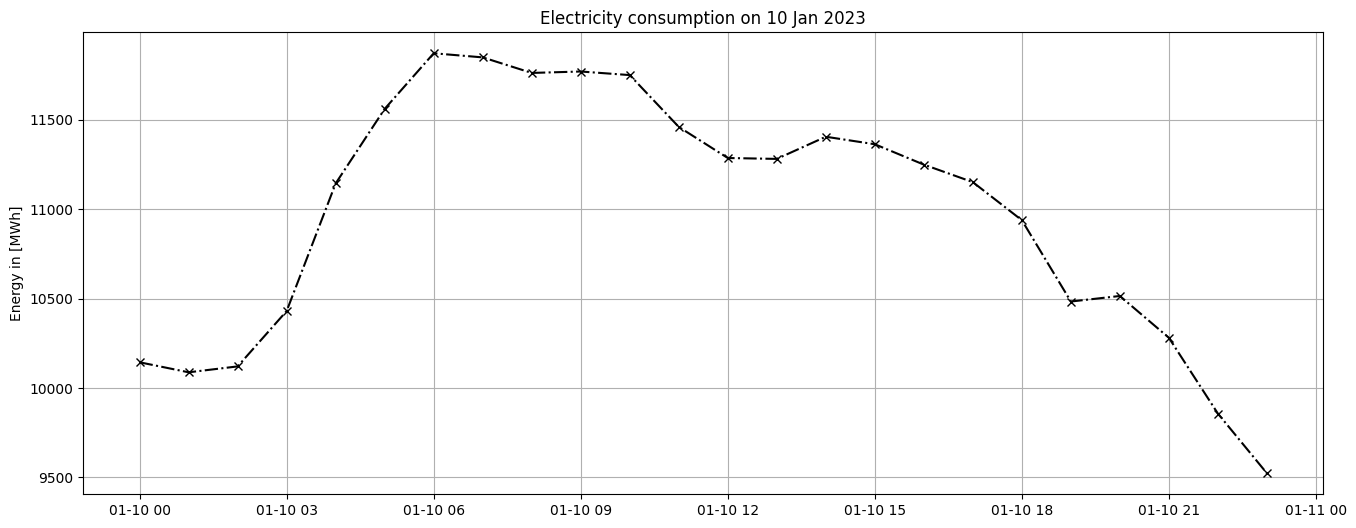

In [10]:
#One day
plt.figure(figsize=(16,6)) 
plt.plot(ElectricityConsumption['2023-01-10'],color='black', marker='x',linestyle='-.') 
plt.title("Electricity consumption on 10 Jan 2023") 
plt.ylabel("Energy in [MWh]") 
plt.grid(True) 
plt.show() 

C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_17300\2443613725.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(ElectricityConsumption['2023-01-10'],color='black', marker='o',linestyle='--')


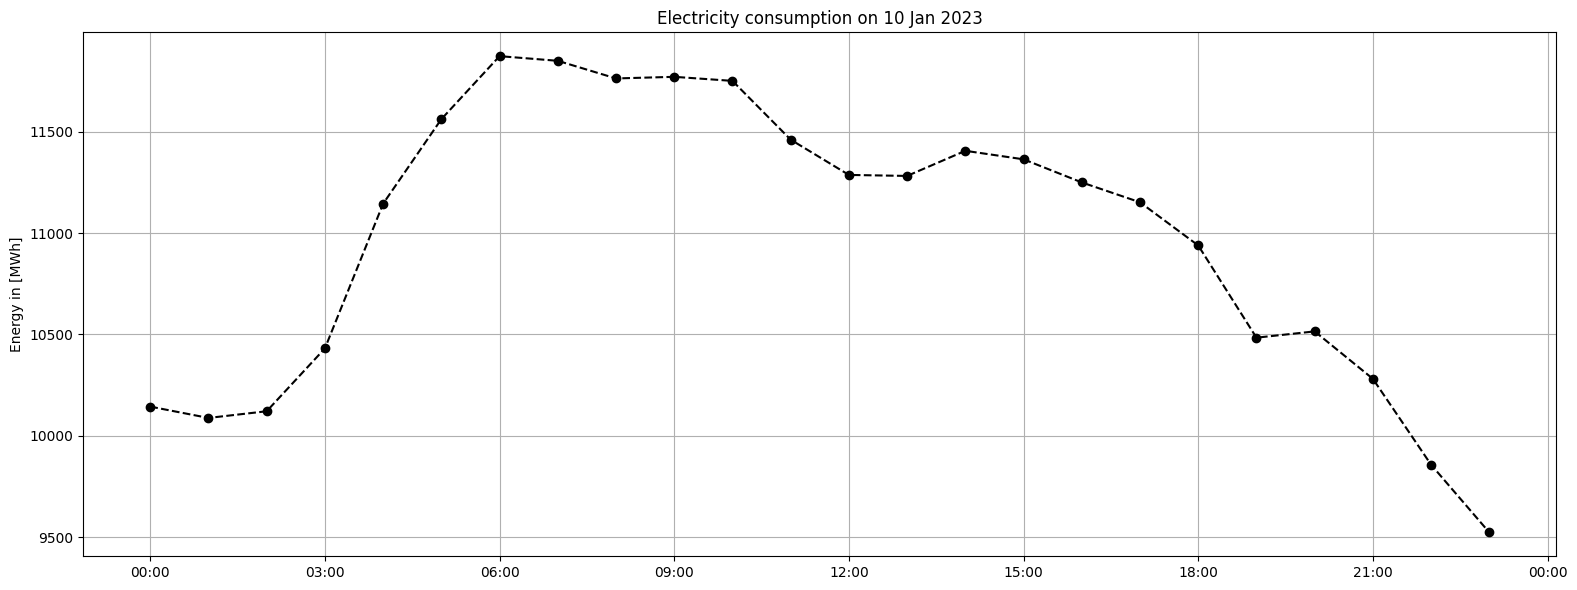

In [11]:
#One day
fig, ax = plt.subplots(1,figsize=(16,6))
plt.plot(ElectricityConsumption['2023-01-10'],color='black', marker='o',linestyle='--') 
plt.title("Electricity consumption on 10 Jan 2023") 
plt.ylabel("Energy in [MWh]") 
plt.grid(True) 
plt.tight_layout()
#change x axis
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.show() 

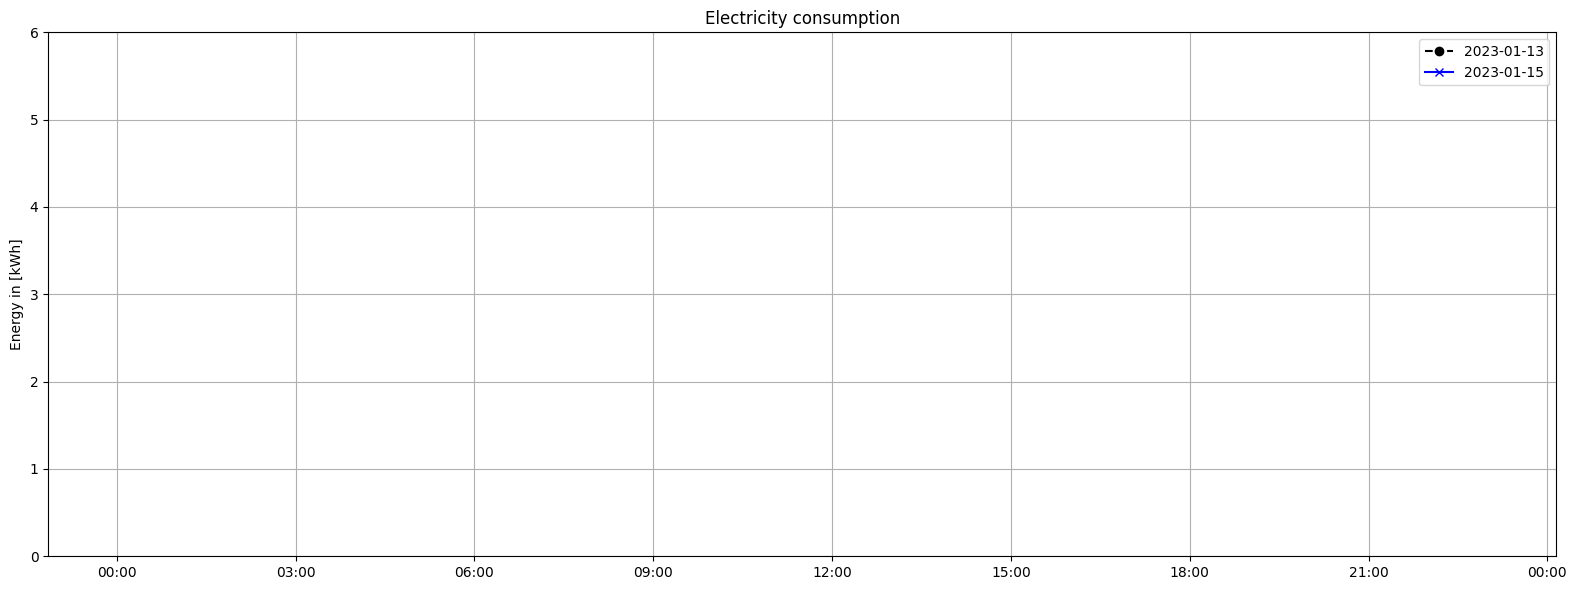

In [12]:
#Plot two days
#Day1
day1 = '2023-01-13'
#Day2
day2 = '2023-01-15'
#Difference
delta = ElectricityConsumption[day2:].index[0].date() - ElectricityConsumption[day1:].index[0].date()
#
fig, ax = plt.subplots(1,figsize=(16,6))
#
plt.plot(ElectricityConsumption[day1:day1], label=day1, color='black', 
         marker='o',linestyle='--')
plt.plot(ElectricityConsumption[day2:day2].index - pd.offsets.Day(delta.days), 
         ElectricityConsumption[day2:day2].values, label=day2, color='blue', marker='x',linestyle='-')
plt.legend()
plt.ylim([0, 6])
plt.title("Electricity consumption") 
plt.ylabel("Energy in [kWh]") 
plt.grid(True)
plt.tight_layout()
#change x axis
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

### Temperature data from FMI

In [18]:
#Uploading the temperature from this day in Lappeenranta
#http://en.ilmatieteenlaitos.fi/download-observations#!/
#Note parse_dates to combine the first columns, also note that the separator from 
#decimal is "." and data separator is ","

Temperature = pd.read_csv("data-test.csv",dayfirst=True,sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
Temperature.info()
Temperature

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8809 entries, 2020-01-01 00:00:00 to 2021-01-02 00:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Air temperature (degC)  8809 non-null   object
dtypes: object(1)
memory usage: 137.6+ KB


,Air temperature (degC)
Year_m_d_Time,
2020-01-01 00:00:00,-0.2
2020-01-01 01:00:00,0.2
2020-01-01 02:00:00,0.4
2020-01-01 03:00:00,0.7
2020-01-01 04:00:00,0.8
...,...
2021-01-01 20:00:00,1.7
2021-01-01 21:00:00,1.5
2021-01-01 22:00:00,1.1


TypeError: unhashable type: 'numpy.ndarray'

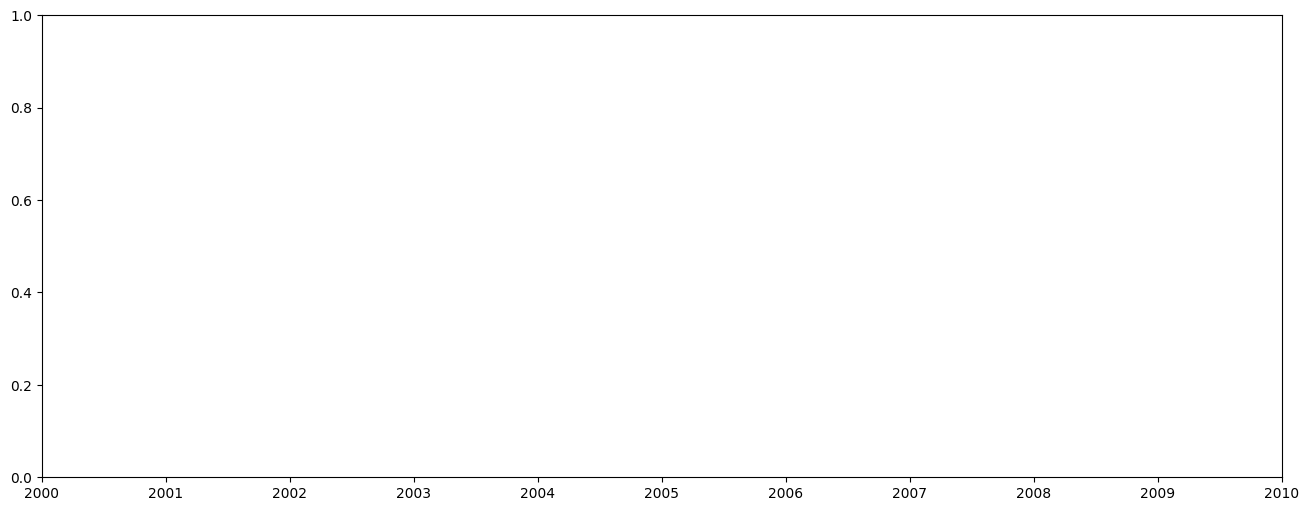

In [19]:
#plotting
plt.figure(figsize=(16,6)) 
plt.plot(Temperature,color='blue', marker='x',linestyle=':') 
plt.title("Air temperature in sep 7, 2013, at Lappeenranta airport station") 
plt.ylabel("Temperature in [°C]") 
plt.grid(True) 
plt.show() 

In [15]:
Temperature2 = pd.read_csv("temp-20180429-LPR-airport.csv",dayfirst=True,sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
Temperature2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2018-04-29 00:00:00 to 2018-04-30 00:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_17300\788672242.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Temperature2['2018-4-29'],color='blue', marker='x',linestyle=':')
C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_17300\788672242.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(Temperature2['2018-4-29'] > 11,color='black', marker='o',linestyle='')


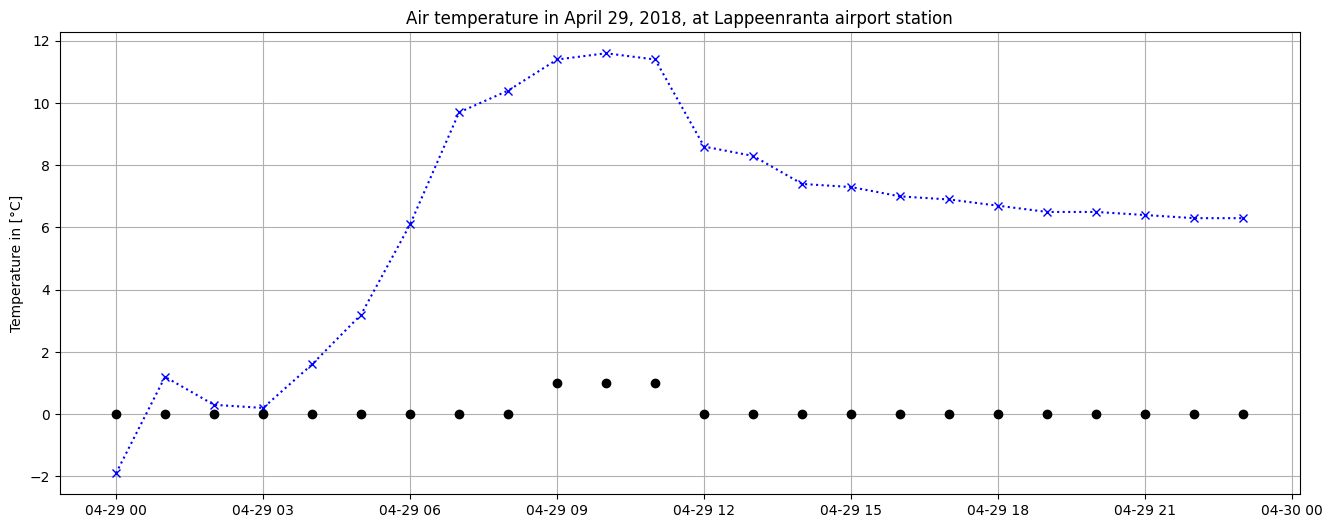

In [16]:
#plotting
plt.figure(figsize=(16,6)) 
plt.plot(Temperature2['2018-4-29'],color='blue', marker='x',linestyle=':') 
plt.plot(Temperature2['2018-4-29'] > 11,color='black', marker='o',linestyle='') 
plt.title("Air temperature in April 29, 2018, at Lappeenranta airport station") 
plt.ylabel("Temperature in [°C]") 
plt.grid(True) 
plt.show() 

### Two plots together: Energy consumption and temperature

KeyError: '2018-4-29'

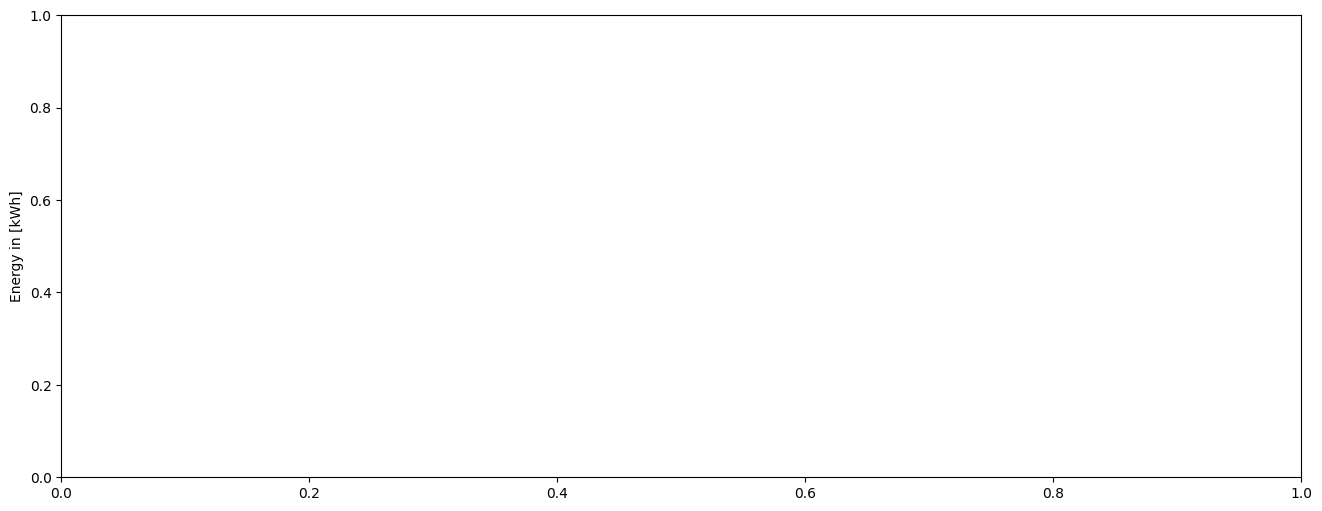

In [17]:
#subplot function
#https://matplotlib.org/2.0.1/examples/api/two_scales.html
####
fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
ax1.set_ylabel("Energy in [kWh]", color='black')
ax1.plot(ElectricityConsumption['2018-4-29'],color='black', marker='o',linestyle='--') 
ax1.plot(ElectricityConsumption['2018-4-29']>0.5,color='black', marker='o',linestyle='') 
#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Temperature in [°C]", color='blue',rotation=270,va="bottom")  
ax2.plot(Temperature2['2018-4-29'],color='blue', marker='x',linestyle=':')
ax2.plot(Temperature2['2018-4-29']>5,color='blue', marker='x',linestyle='')
#
ax1.grid(True)
plt.title("Electricity consumption and air temperature in April 29, 2018") #title     
#change x axis
xfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()
#NOTE the "1" is different in the different energy and the temperature plots (check scales)

## What you can tell this house?

C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_2604\194297153.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax1.plot(ElectricityConsumption['2018-4-29']>0.2,color='red', marker='o',linestyle='')
C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_2604\194297153.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax2.plot(Temperature2['2018-4-29']>7,color='blue', marker='x',linestyle='')


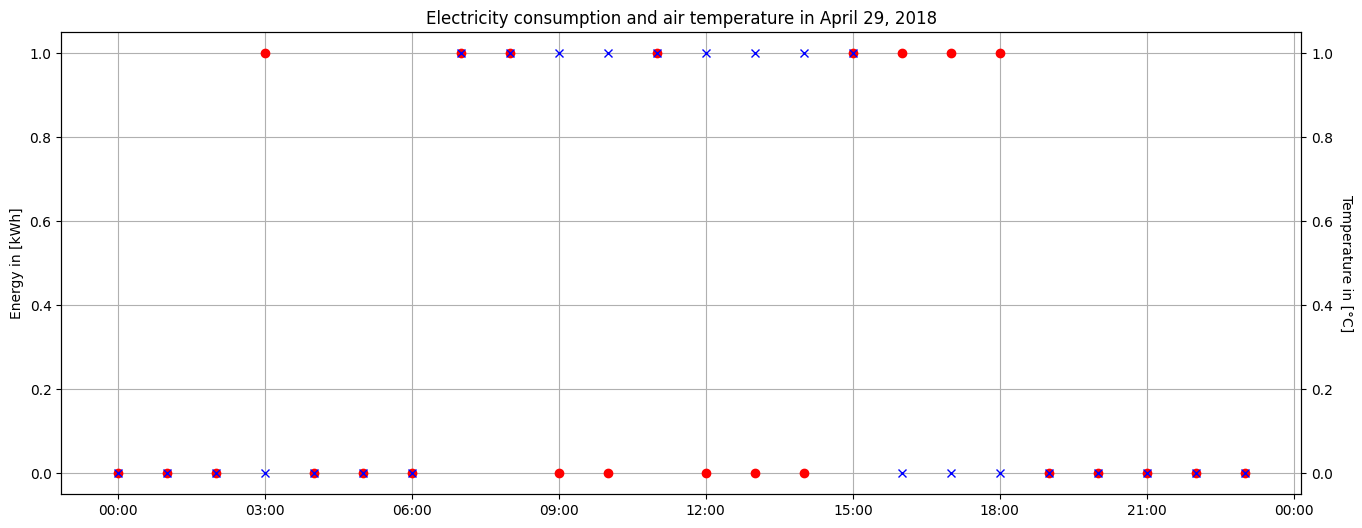

In [ ]:
#subplot function
#https://matplotlib.org/2.0.1/examples/api/two_scales.html
####
fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
ax1.set_ylabel("Energy in [kWh]", color='black')
#ax1.plot(ElectricityConsumption['2018-4-29'],color='black', marker='o',linestyle='--') 
ax1.plot(ElectricityConsumption['2018-4-29']>0.2,color='red', marker='o',linestyle='') 
#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Temperature in [°C]", color='black',rotation=270,va="bottom")  
#ax2.plot(Temperature2['2018-4-29'],color='blue', marker='x',linestyle=':')
ax2.plot(Temperature2['2018-4-29']>7,color='blue', marker='x',linestyle='')
#
ax1.grid(True)
plt.title("Electricity consumption and air temperature in April 29, 2018") #title     
#change x axis
xfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()

C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_2604\1700624610.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aux=(Temperature2['2018-4-29'].values>7) & (ElectricityConsumption['2018-4-29'].values>0.2)
C:\Users\Semen Koveshnikov\AppData\Local\Temp\ipykernel_2604\1700624610.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(ElectricityConsumption['2018-4-29'].index, aux,color='black', marker='o',linestyle='')


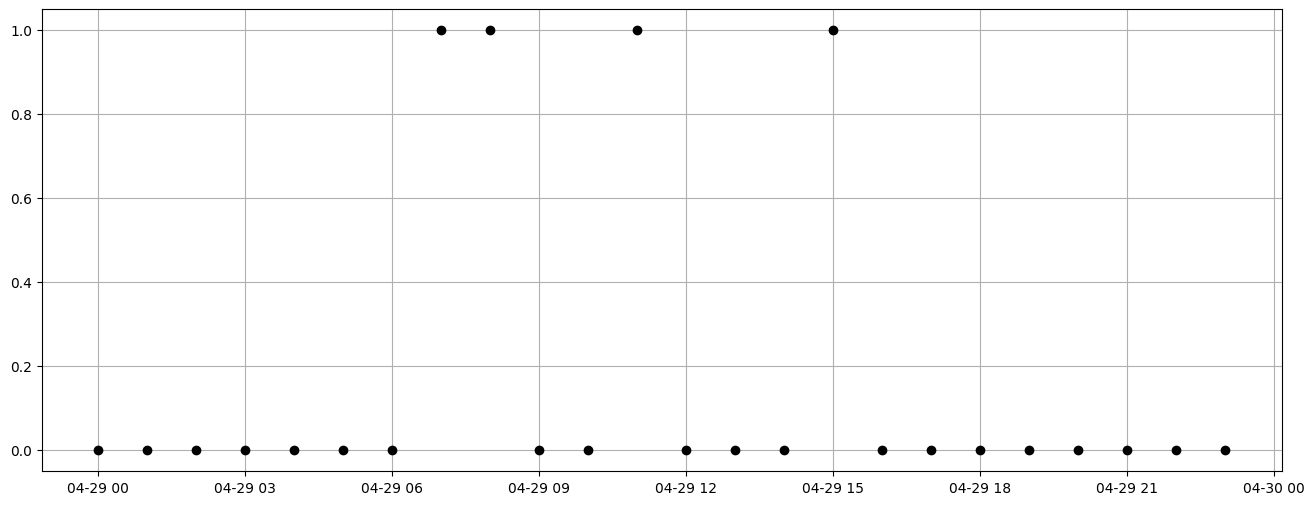

In [ ]:
#plotting
aux=(Temperature2['2018-4-29'].values>7) & (ElectricityConsumption['2018-4-29'].values>0.2)
#aux2=(Temperature2['2018-4-29'].values>7) | (ElectricityConsumption['2018-4-29'].values>0.2)
plt.figure(figsize=(16,6)) 
plt.plot(ElectricityConsumption['2018-4-29'].index, aux,color='black', marker='o',linestyle='') 
plt.grid(True) 
plt.show() 